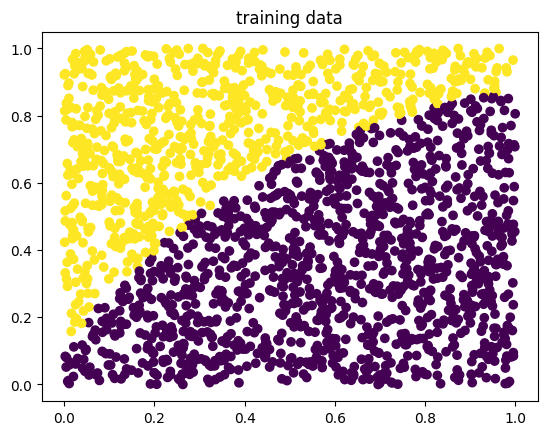

In [15]:
import numpy as np
import matplotlib.pyplot as plt 
import pickle
import math

pkl_file = open('classifier_data.pkl', 'rb')
x_train, y_train = pickle.load(pkl_file)
n_train = np.size(y_train)

plt.scatter(x_train[:,0],x_train[:,1], c=y_train[:,0])
plt.title('training data')
plt.show()

In [5]:
def log_graddescent(X,y,w_init,tau,lam,it):
  W = np.zeros((w_init.shape[0],it))
  W[:,[0]] = w_init
  gradient=0
  for k in range(it-1):
    for i in range(1,len(X)):
      gradient += -(y[i]*X[i,:].transpose()) / (1+
                                  np.exp(y[i]*X[i,:].transpose()@W[:,[k]]))
    W[:,[k+1]] = W[:,[k]]- tau*(
        np.array([gradient]).transpose() + 2*lam*W[:,[k]])
    gradient=0
  return W 


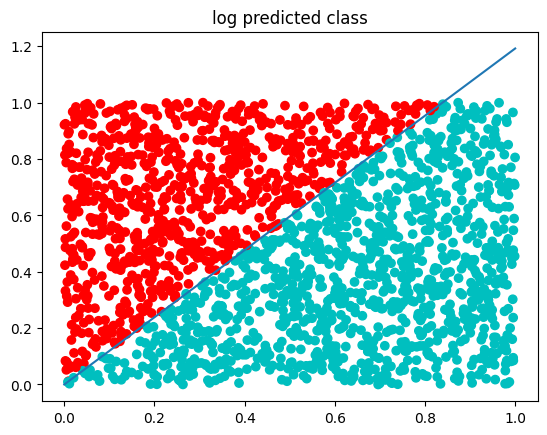

Error Rate:  0.1145


In [32]:
w_init = np.array([[0], [0]])
W = log_graddescent(x_train, y_train, w_init, 0.01, 1, 20)
w_opt = W[:, 19]
y_hat = np.sign(x_train@w_opt)
y_hat = np.array([y_hat]).transpose()

plt.scatter(x_train[:,0],x_train[:,1], 
            color=['c' if i==-1 else 'r' for i in y_hat[:,0]])
plt.plot([0, -(w_opt[0]/w_opt[1])])
plt.title('log predicted class')
plt.show()

error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat, y_train))]
print("Error Rate: ", sum(error_vec)/len(y_train))

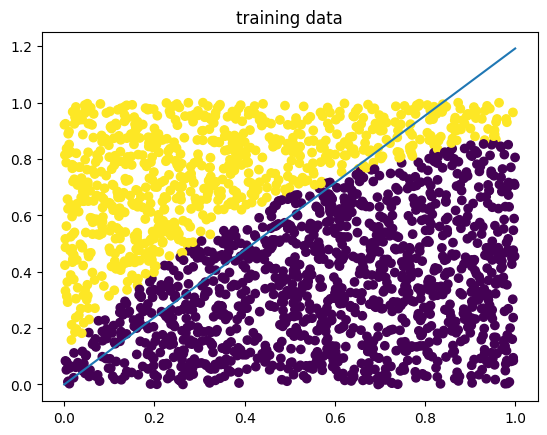

In [33]:
plt.scatter(x_train[:,0],x_train[:,1], c=y_train[:,0])
plt.plot([0, -(w_opt[0]/w_opt[1])])
plt.title('training data')
plt.show()

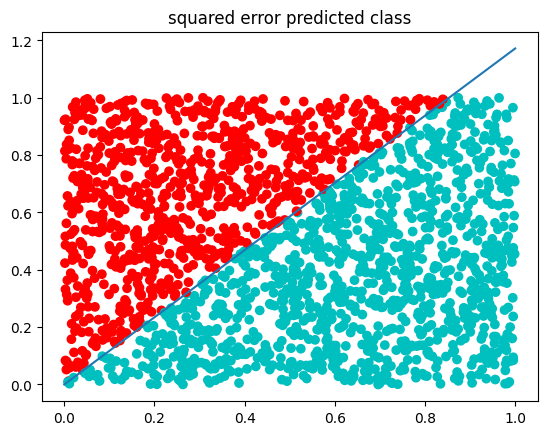

Error Rate:  0.114


In [30]:
w_opt = np.linalg.inv(x_train.transpose()@x_train)@x_train.transpose()@y_train
y_hat = np.sign(x_train@w_opt)

plt.scatter(x_train[:,0],x_train[:,1], 
            color=['c' if i==-1 else 'r' for i in y_hat[:,0]])
plt.plot([0, -(w_opt[0]/w_opt[1])])
plt.title('squared error predicted class')
plt.show()

error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat, y_train))]
print("Error Rate: ", sum(error_vec)/len(y_train))

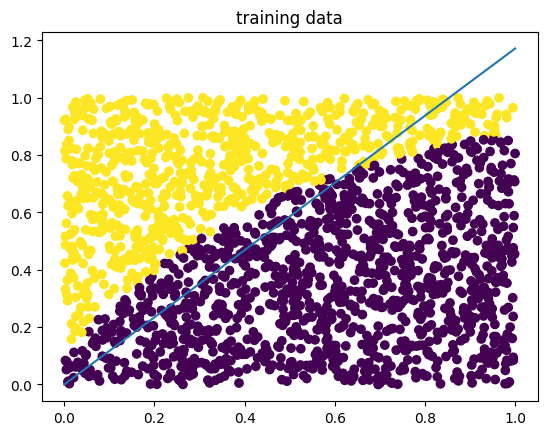

In [31]:
plt.scatter(x_train[:,0],x_train[:,1], c=y_train[:,0])
plt.plot([0, -(w_opt[0]/w_opt[1])])
plt.title('training data')
plt.show()

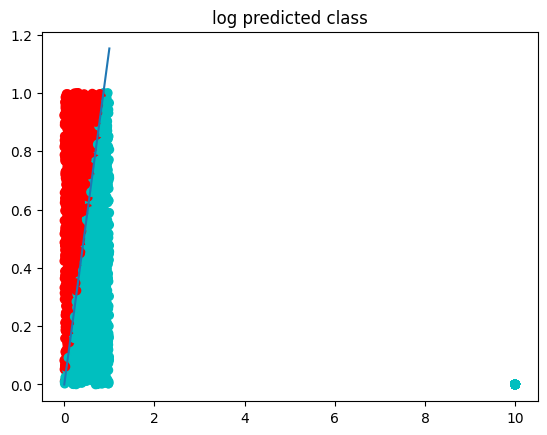

Error Rate:  0.1155


In [28]:
new_y = np.full((1000, 1), -1)
y_train_new = np.vstack((y_train, new_y))
new_x = np.full((1000, 2), np.array([10,0]))
x_train_new = np.vstack((x_train, new_x))

w_init = np.array([[0], [0]])
W = log_graddescent(x_train_new, y_train_new, w_init, 0.01, 1, 20)

w_opt = W[:, 19]
y_hat = np.sign(x_train_new@w_opt)
y_hat = np.array([y_hat]).transpose()

plt.scatter(x_train_new[:,0],x_train_new[:,1], 
            color=['c' if i==-1 else 'r' for i in y_hat[:,0]])
plt.plot([0, -(w_opt[0]/w_opt[1])])
plt.title('log predicted class')
plt.show()

error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat, y_train_new))]
print("Error Rate: ", sum(error_vec)/len(y_train))

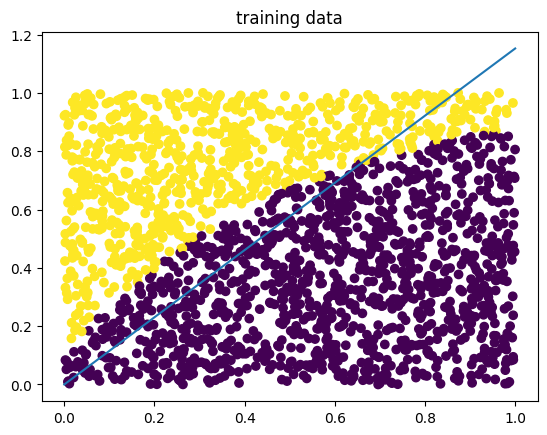

In [29]:
plt.scatter(x_train[:,0],x_train[:,1], c=y_train[:,0])
plt.plot([0, -(w_opt[0]/w_opt[1])])
plt.title('training data')
plt.show()

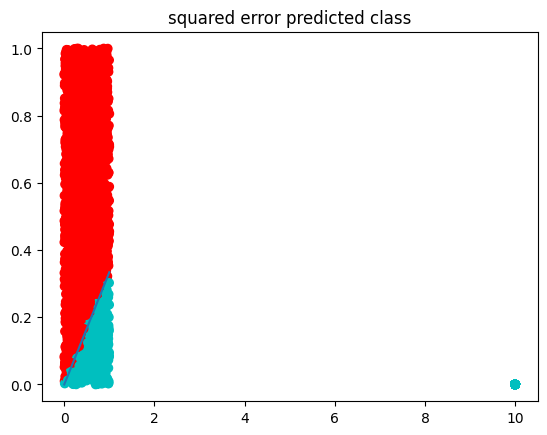

Error Rate:  0.451


In [26]:
w_opt = np.linalg.inv(
    x_train_new.transpose()@x_train_new)@x_train_new.transpose()@y_train_new
y_hat = np.sign(x_train_new@w_opt)

plt.scatter(x_train_new[:,0],x_train_new[:,1], 
            color=['c' if i==-1 else 'r' for i in y_hat[:,0]])
plt.plot([0, -(w_opt[0]/w_opt[1])])
plt.title('squared error predicted class')
plt.show()

error_vec = [0 if i[0]==i[1] else 1 for i in np.hstack((y_hat, y_train_new))]
print("Error Rate: ", sum(error_vec)/len(y_train))

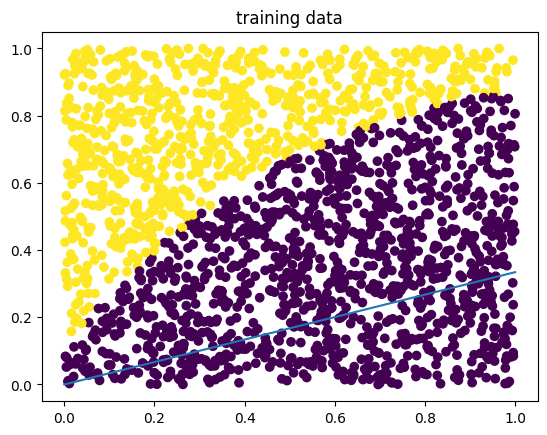

In [27]:
plt.scatter(x_train[:,0],x_train[:,1], c=y_train[:,0])
plt.plot([0, -(w_opt[0]/w_opt[1])])
plt.title('training data')
plt.show()